In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, accuracy_score, recall_score, roc_curve, precision_recall_curve, auc
from sklearn.tree import DecisionTreeClassifier
import warnings

# 1. EDA

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/loan_sanction_train.csv');
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

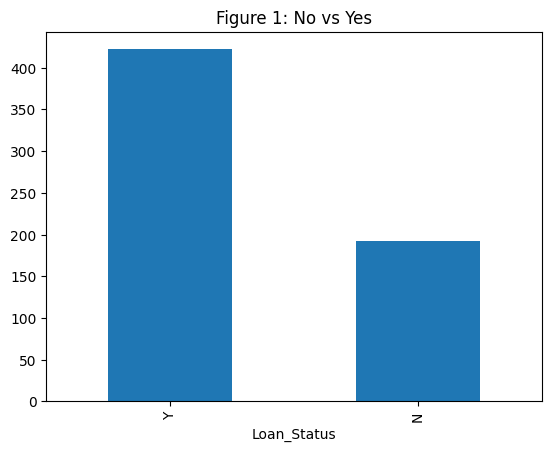

In [9]:
## Predicted variable distribution
df['Loan_Status'].value_counts().plot(kind='bar')
plt.title('Figure 1: No vs Yes')
plt.show()

In [10]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
df = df.drop('Loan_ID', axis=1)

In [25]:
# Selecting only numerical columns
numerical_df = df.select_dtypes(include=['number'])

numerical_df.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.538290,-0.015645,0.006986
CoapplicantIncome,-0.116605,1.000000,0.190377,-0.050321,-0.058795
LoanAmount,0.538290,0.190377,1.000000,0.058519,-0.032711
Loan_Amount_Term,-0.015645,-0.050321,0.058519,1.000000,0.050145
Credit_History,0.006986,-0.058795,-0.032711,0.050145,1.000000


In [26]:
numerical_df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.538290,-0.015645,0.006986
CoapplicantIncome,-0.116605,1.000000,0.190377,-0.050321,-0.058795
LoanAmount,0.538290,0.190377,1.000000,0.058519,-0.032711
Loan_Amount_Term,-0.015645,-0.050321,0.058519,1.000000,0.050145
Credit_History,0.006986,-0.058795,-0.032711,0.050145,1.000000


<Axes: >

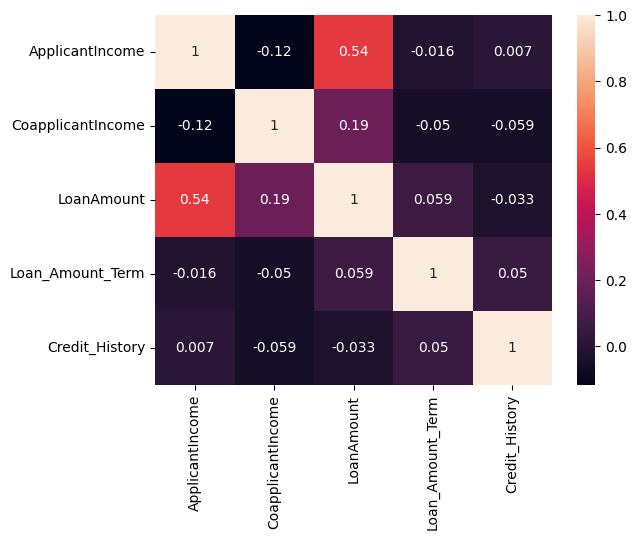

In [28]:
sns.heatmap(numerical_df.corr(), annot=True) #correlation plot

In [29]:
numerical_df.cov()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,3.732039e+07,-2.084490e+06,290502.424393,-7854.885728,17.874128
CoapplicantIncome,-2.084490e+06,8.562930e+06,49213.843474,-12101.648543,-72.060088
LoanAmount,2.905024e+05,4.921384e+04,7804.066975,424.860360,-1.210292
Loan_Amount_Term,-7.854886e+03,-1.210165e+04,424.860360,6754.190796,1.726055
Credit_History,1.787413e+01,-7.206009e+01,-1.210292,1.726055,0.175420


In [30]:
numerical_df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.362274
Loan_Amount_Term    -2.513134
Credit_History      -1.310835
dtype: float64

<ipython-input-14-428a44165731>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Credit_History'])


<Axes: xlabel='Credit_History', ylabel='Density'>

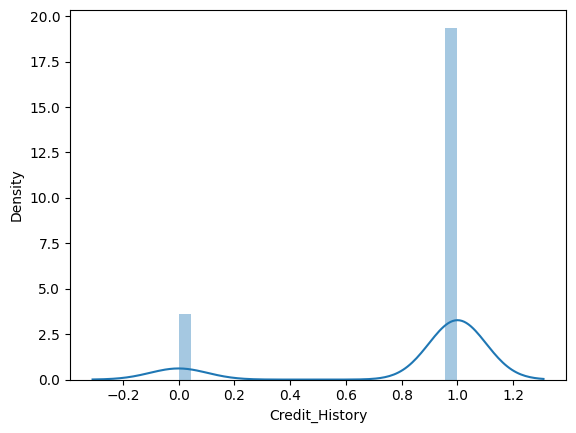

In [14]:
sns.distplot(df['Credit_History'])

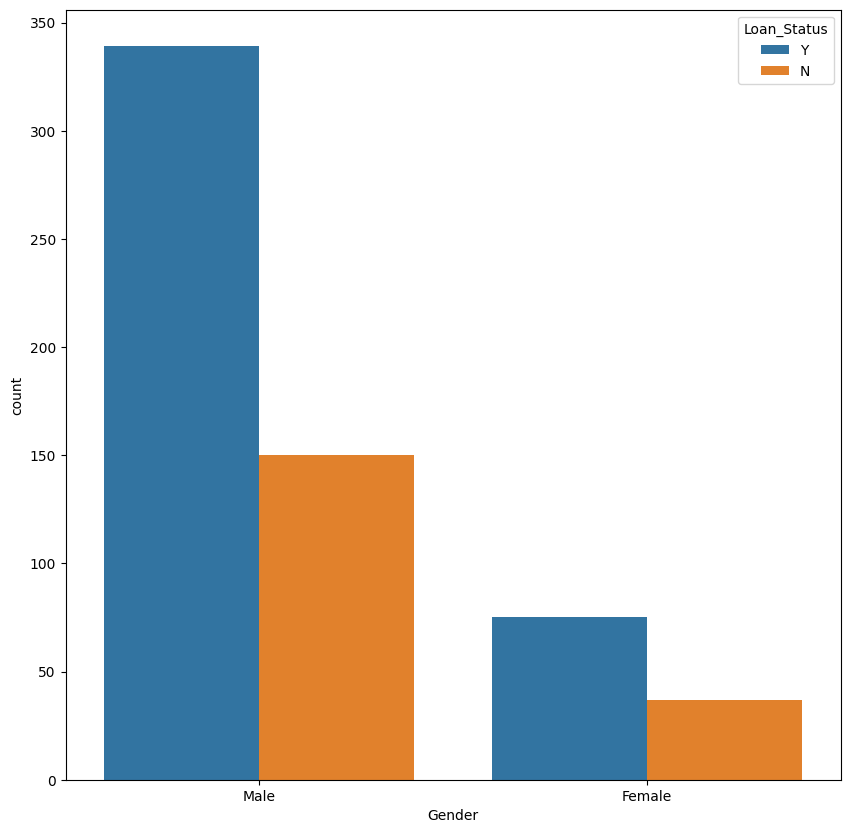

In [15]:
plt.figure(figsize=(10,10))

sns.countplot(x = "Gender", data=df, hue = "Loan_Status") #Countplot for Age and gender
plt.show()

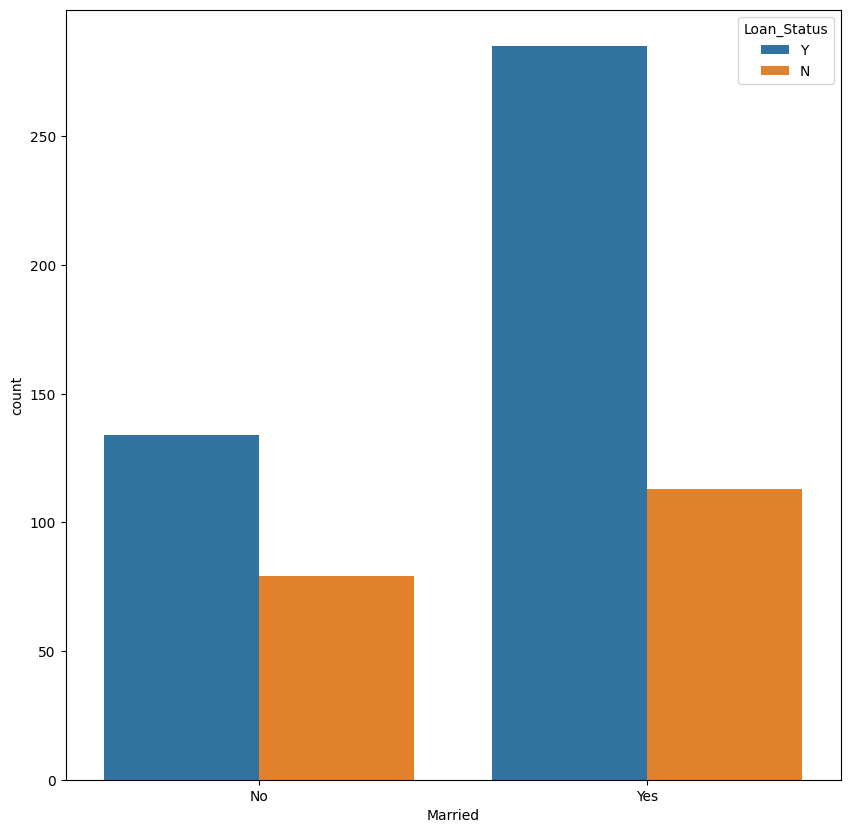

In [ ]:
plt.figure(figsize=(10,10))

sns.countplot(x = "Married", data=df, hue = "Loan_Status") #Countplot for Age and gender
plt.show()

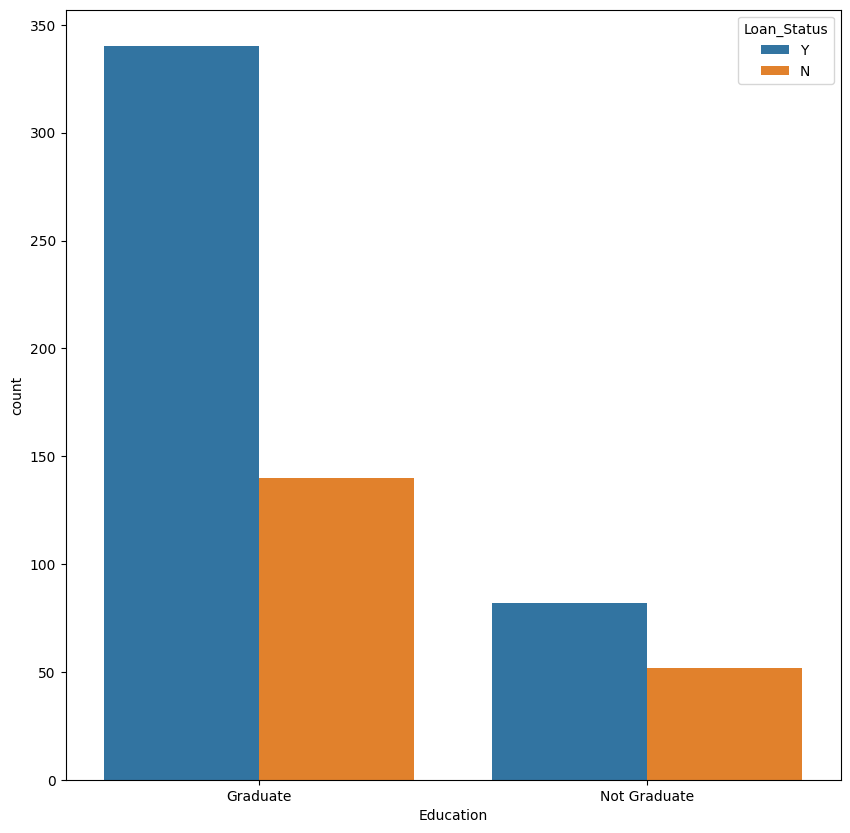

In [ ]:
plt.figure(figsize=(10,10))

sns.countplot(x = "Education", data=df, hue = "Loan_Status") #Countplot for Age and gender
plt.show()

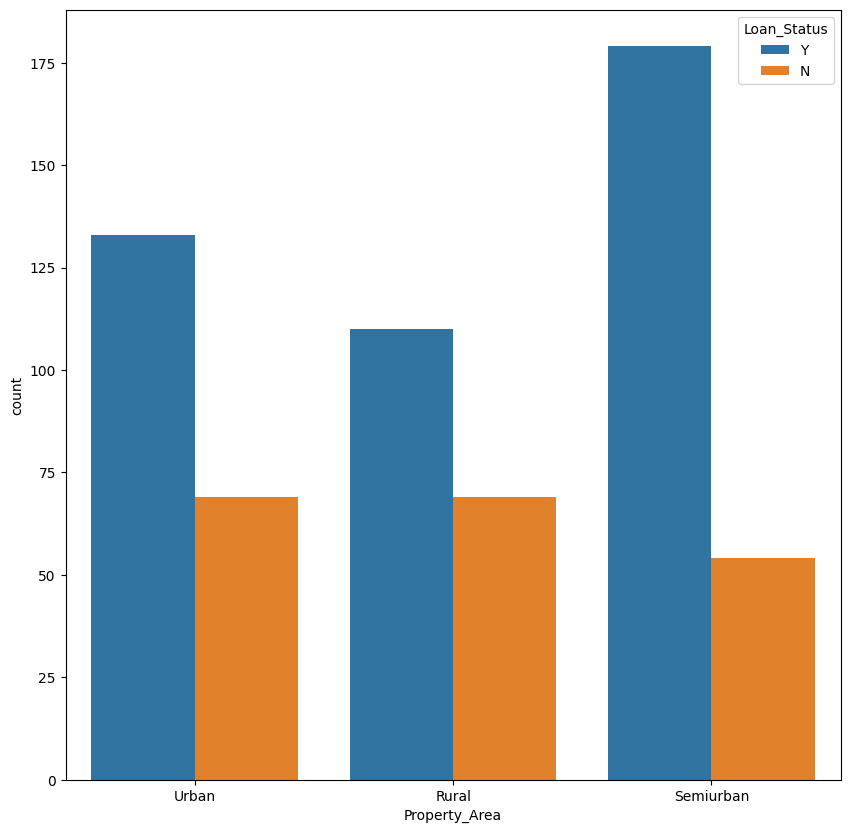

In [ ]:
plt.figure(figsize=(10,10))

sns.countplot(x = "Property_Area", data=df, hue = "Loan_Status") #Countplot for Age and gender
plt.show()

<ipython-input-29-1a3d35e57543>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'])


<Axes: xlabel='ApplicantIncome', ylabel='Density'>

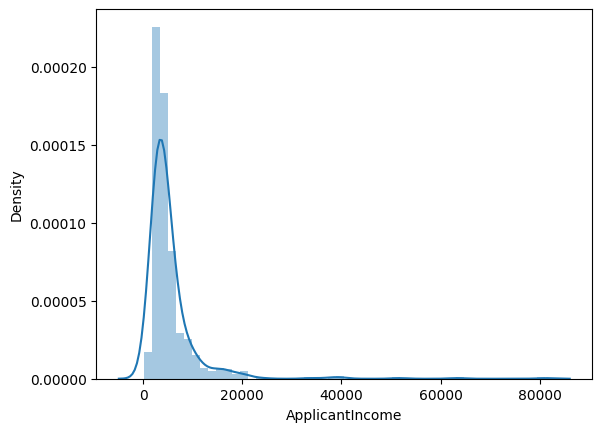

In [ ]:
sns.distplot(df['ApplicantIncome'])

In [ ]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [31]:
# The below code says the percentage of the null values in the data.
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
df = df.fillna(0)

# Label encoding

In [19]:
from sklearn.preprocessing import LabelEncoder

In [33]:
# Handling missing values
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

# Converting columns to string type before encoding
for column in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    df[column] = df[column].astype(str)

# Encoding categorical columns
le = LabelEncoder()
for column in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
    df[column] = le.fit_transform(df[column])

# Selecting only numerical columns for correlation matrix
numerical_df = df.select_dtypes(include=['number'])

# Computing the correlation matrix
correlation_matrix = numerical_df.corr()

print(correlation_matrix)

                     Gender   Married  Dependents  Education  Self_Employed  \
Gender             1.000000  0.277459    0.113484   0.068774      -0.031116   
Married            0.277459  1.000000    0.339987   0.022530       0.030171   
Dependents         0.113484  0.339987    1.000000   0.055752       0.052597   
Education          0.068774  0.022530    0.055752   1.000000       0.000820   
Self_Employed     -0.031116  0.030171    0.052597   0.000820       1.000000   
ApplicantIncome   -0.024689  0.047691    0.118202  -0.140760       0.092967   
CoapplicantIncome  0.073642  0.083270    0.030430  -0.062290      -0.052384   
LoanAmount         0.009869  0.140687    0.156164  -0.173244       0.076953   
Loan_Amount_Term  -0.049441 -0.081172   -0.035984  -0.108857      -0.011535   
Credit_History     0.039796 -0.028471   -0.017523  -0.081637      -0.006262   
Property_Area     -0.008142 -0.003370   -0.000244  -0.065243      -0.028730   
Loan_Status        0.029040  0.075547    0.010118  -

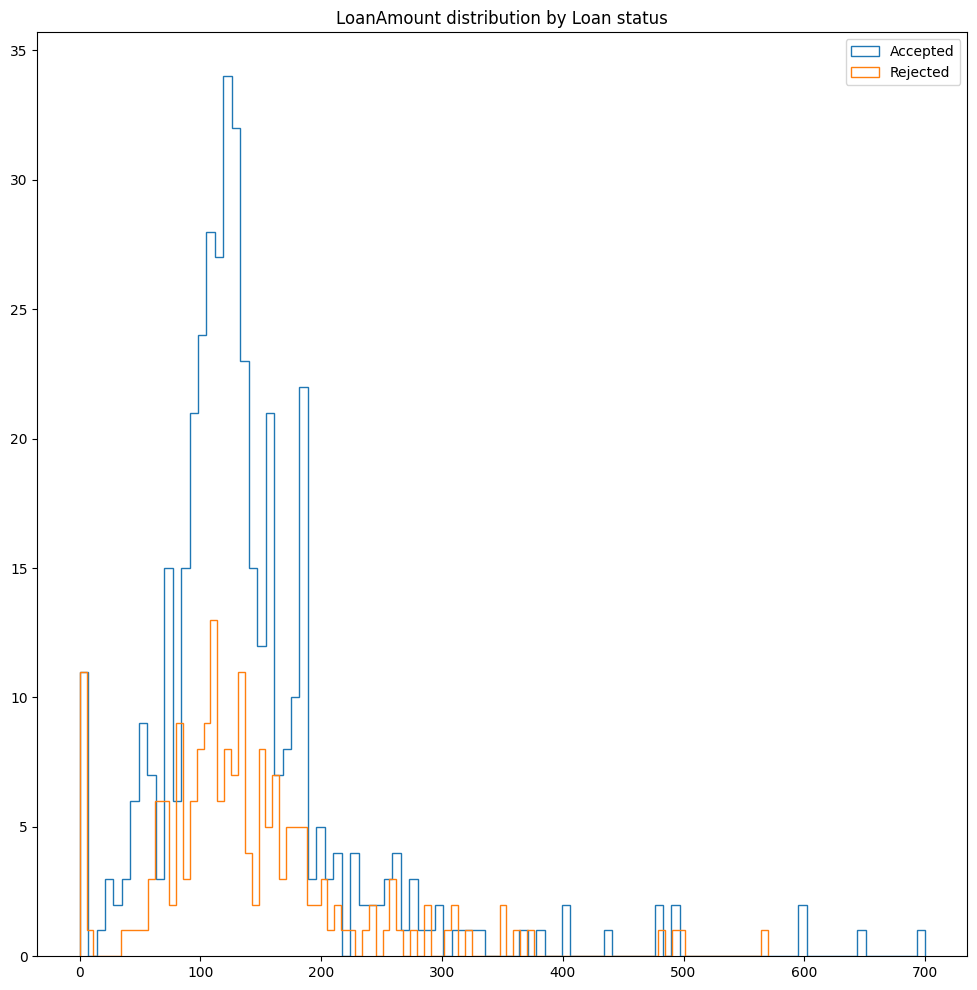

In [34]:
##LoanAmount distribution per default status:
plt.figure(figsize=(12,12))
plt.hist(df[df['Loan_Status']==1]['LoanAmount'], histtype='step', bins=100, label='Accepted')
plt.hist(df[df['Loan_Status']==0]['LoanAmount'], histtype='step', bins=100, label='Rejected')
plt.title('LoanAmount distribution by Loan status')
plt.legend()
plt.show()

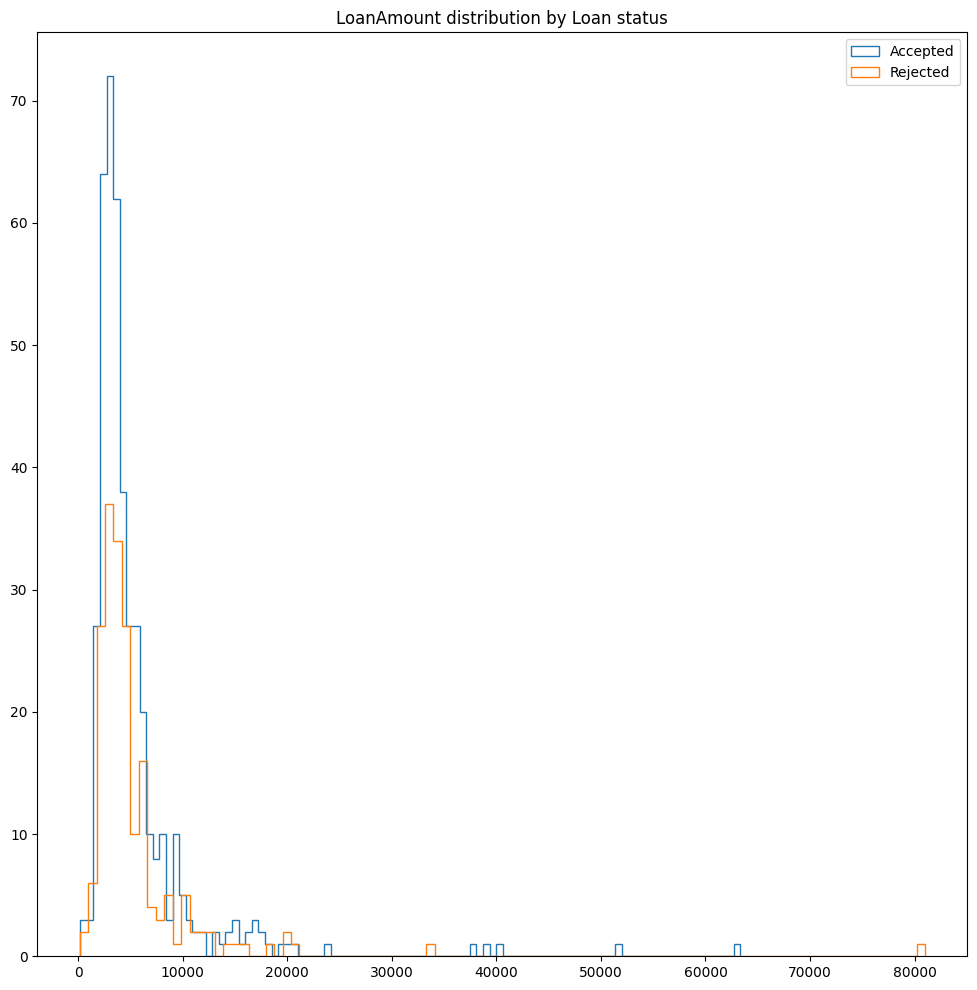

In [ ]:
##LoanAmount distribution per default status:
plt.figure(figsize=(12,12))
plt.hist(df[df['Loan_Status']==1]['ApplicantIncome'], histtype='step', bins=100, label='Accepted')
plt.hist(df[df['Loan_Status']==0]['ApplicantIncome'], histtype='step', bins=100, label='Rejected')
plt.title('LoanAmount distribution by Loan status')
plt.legend()
plt.show()

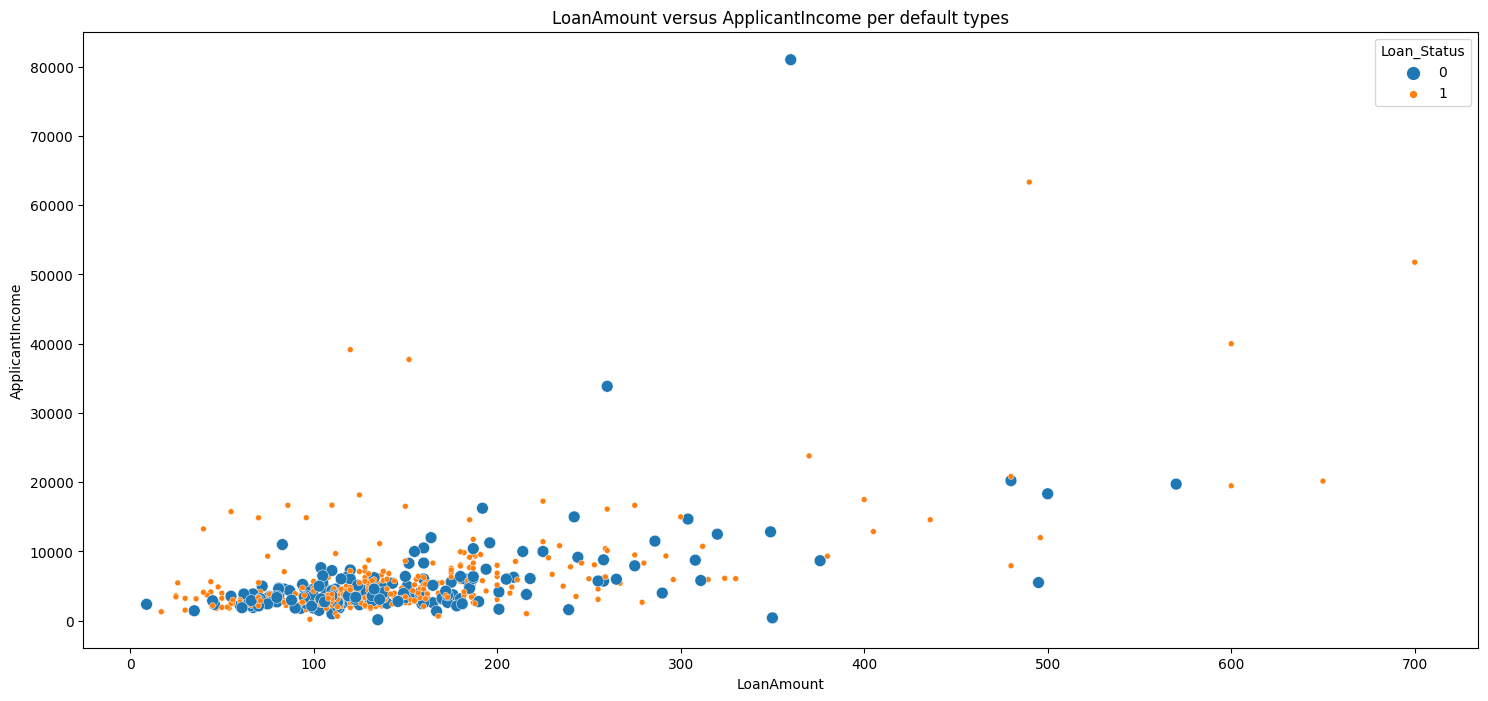

In [ ]:
##LoanAmount versus ApplicantIncome per Loan_Status
plt.figure(figsize=(18,8))
sns.scatterplot(x='LoanAmount', y='ApplicantIncome', hue='Loan_Status', data=df, size='Loan_Status')
plt.title('LoanAmount versus ApplicantIncome per default types')
plt.show()


#  Model Selection

In [35]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

#Importing all machine learining packages
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier


#output performance metrices
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score



# from skopt import BayesSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold

In [37]:
##Split data:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=25, stratify=y)

In [38]:
from imblearn.over_sampling import SMOTE
over = SMOTE()
X, y = over.fit_resample(X, y)

In [39]:
y.value_counts()

Loan_Status
1    422
0    422
Name: count, dtype: int64

In [40]:
classifier = LogisticRegression() # importing logistic regression and storing in variable Classifier
classifier.fit(X_train,y_train) #fitting the train and test data into the model
y_lr=classifier.predict(X_test)

In [41]:
print('Confusion Matrix \n',confusion_matrix(y_lr,y_test)) # confusion matrix is for finding the misclassification in the data, using predicted values and y_test values
print()
print('Accuracy Score \n', accuracy_score(y_lr,y_test)) #Accurcy score for predicted values and y_test values
print()
print('Classification Report \n',classification_report(y_lr,y_test)) #classification report for preidicted values and y_test values

Confusion Matrix 
 [[ 25  14]
 [ 33 113]]

Accuracy Score 
 0.745945945945946

Classification Report 
               precision    recall  f1-score   support

           0       0.43      0.64      0.52        39
           1       0.89      0.77      0.83       146

    accuracy                           0.75       185
   macro avg       0.66      0.71      0.67       185
weighted avg       0.79      0.75      0.76       185



In [ ]:
#comparing the actual vs predicted values
y_pred = classifier.predict(X_test).reshape(X_test.shape[0],)
pred_df = pd.DataFrame({'Actual value':y_test, 'Predicted value':y_pred}).astype('int64')

print(pred_df.head(10))

from sklearn.metrics import mean_absolute_error

MAE_val = mean_absolute_error(y_true=pred_df['Actual value'], y_pred=pred_df['Predicted value'])

     Actual value  Predicted value
273             1                1
123             1                1
480             1                1
455             1                1
425             1                1
296             1                1
10              1                1
297             1                1
508             1                1
579             1                1


In [ ]:
classifier2 = SVC() #Support vector classifier
classifier2.fit(X_train,y_train)
y_svc=classifier2.predict(X_test)

print('Confusion Matrix \n',confusion_matrix(y_svc,y_test))
print()
print('Accuracy Score \n', accuracy_score(y_svc,y_test))
print()
print('Classification Report \n',classification_report(y_svc,y_test))

Confusion Matrix 
 [[  0   0]
 [ 58 127]]

Accuracy Score 
 0.6864864864864865

Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.69      0.81       185

    accuracy                           0.69       185
   macro avg       0.50      0.34      0.41       185
weighted avg       1.00      0.69      0.81       185



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
classifier3 = RandomForestClassifier()
classifier3.fit(X_train,y_train)
y_rfc=classifier3.predict(X_test)
print('Confusion Matrix \n',confusion_matrix(y_rfc,y_test))
print()
print('Accuracy Score \n', accuracy_score(y_rfc,y_test))
print()
print('Classification Report \n',classification_report(y_rfc,y_test))

Confusion Matrix 
 [[ 24  17]
 [ 34 110]]

Accuracy Score 
 0.7243243243243244

Classification Report 
               precision    recall  f1-score   support

           0       0.41      0.59      0.48        41
           1       0.87      0.76      0.81       144

    accuracy                           0.72       185
   macro avg       0.64      0.67      0.65       185
weighted avg       0.77      0.72      0.74       185



In [ ]:
classifier4 = GradientBoostingClassifier()
classifier4.fit(X_train,y_train)
y_gbc=classifier4.predict(X_test)

print('Confusion Matrix \n',confusion_matrix(y_gbc,y_test))
print()
print('Accuracy Score \n', accuracy_score(y_gbc,y_test))
print()
print('Classification Report \n',classification_report(y_gbc,y_test))

Confusion Matrix 
 [[ 26  17]
 [ 32 110]]

Accuracy Score 
 0.7351351351351352

Classification Report 
               precision    recall  f1-score   support

           0       0.45      0.60      0.51        43
           1       0.87      0.77      0.82       142

    accuracy                           0.74       185
   macro avg       0.66      0.69      0.67       185
weighted avg       0.77      0.74      0.75       185



In [ ]:
classifier5 = GaussianNB()
classifier5.fit(X_train,y_train)
y_gb=classifier5.predict(X_test)

print('Confusion Matrix \n',confusion_matrix(y_gb,y_test))
print()
print('Accuracy Score \n', accuracy_score(y_gb,y_test))
print()
print('Classification Report \n',classification_report(y_gb,y_test))

Confusion Matrix 
 [[ 28  19]
 [ 30 108]]

Accuracy Score 
 0.7351351351351352

Classification Report 
               precision    recall  f1-score   support

           0       0.48      0.60      0.53        47
           1       0.85      0.78      0.82       138

    accuracy                           0.74       185
   macro avg       0.67      0.69      0.67       185
weighted avg       0.76      0.74      0.74       185

